In [106]:
#installing the required libraries 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import matplotlib.pyplot as plt
import plotly.express as px


In [107]:
import warnings
warnings.filterwarnings("ignore")

In [108]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [109]:
#importing the data set
df = pd.read_excel("D:\Wind_Turbine_Database_final_projet.xlsx")
df.head(5)


,OBJECTID,Province/Territory,Project name,Total project capacity (MW),Turbine identifier,Turbine number in project,Turbine rated capacity (kW),Rotor diameter (m),Hub height (m),Manufacturer,Model,Commissioning date,Latitude,Longitude,Notes
0,1,Alberta,Optimist Wind Energy,0.90,OWE1,1/2,150,23.0,30.0,Bonus,AN 150/30,1993,49.525354,-114.054796,NaN
1,2,Alberta,Castle River Wind Farm,44.00,CRW1,1/60,600,44.0,40.0,Vestas,V44/600,1997,49.512641,-114.035712,NaN
2,3,Alberta,Waterton Wind Turbines,3.78,WWT1,1/6,600,44.0,50.0,Vestas,V44/600,1998,49.233069,-113.654899,NaN
3,4,Alberta,Waterton Wind Turbines,3.78,WWT2,2/6,600,44.0,50.0,Vestas,V44/600,1998,49.233034,-113.630213,NaN
4,5,Alberta,Waterton Wind Turbines,3.78,WWT3,3/6,600,44.0,50.0,Vestas,V44/600,1998,49.217547,-113.680161,NaN


In [110]:
df['Turbine identifier'].unique()

array(['OWE1', 'CRW1', 'WWT1', ..., 'CYP16', 'HAH1', 'HAH2'], dtype=object)

In [111]:
# splitting the turbine number in the project into number
df[['turbine number', 'total turbines']] = df['Turbine number in project'].str.split('/', expand=True) 

In [112]:
df.head(3)

,OBJECTID,Province/Territory,Project name,Total project capacity (MW),Turbine identifier,Turbine number in project,Turbine rated capacity (kW),Rotor diameter (m),Hub height (m),Manufacturer,Model,Commissioning date,Latitude,Longitude,Notes,turbine number,total turbines
0,1,Alberta,Optimist Wind Energy,0.90,OWE1,1/2,150,23.0,30.0,Bonus,AN 150/30,1993,49.525354,-114.054796,NaN,1,2
1,2,Alberta,Castle River Wind Farm,44.00,CRW1,1/60,600,44.0,40.0,Vestas,V44/600,1997,49.512641,-114.035712,NaN,1,60
2,3,Alberta,Waterton Wind Turbines,3.78,WWT1,1/6,600,44.0,50.0,Vestas,V44/600,1998,49.233069,-113.654899,NaN,1,6


In [113]:
df.dtypes

OBJECTID                         int64
Province/Territory              object
Project name                    object
Total project capacity (MW)    float64
Turbine identifier              object
Turbine number in project       object
Turbine rated capacity (kW)     object
Rotor diameter (m)             float64
Hub height (m)                 float64
Manufacturer                    object
Model                           object
Commissioning date              object
Latitude                       float64
Longitude                      float64
Notes                           object
turbine number                  object
total turbines                  object
dtype: object

In [114]:
df['Commissioning date'].unique()

array([1993, 1997, 1998, 2000, 2001, 2002, 2003, 2004, 2006, 2007, 2009,
       2010, 2011, 2012, 2014, 2015, '2000/2001', '2006/2007', 2017, 2019,
       '2005/2006/2012', 2008, 2018, 2005, 2013, 2016, '2004/2005', 1995,
       '2002/2006', '2006/2008', 1999, '2011/2012', '2013/2014',
       '2014/2015', '2001/2003'], dtype=object)

In [115]:
df['Turbine rated capacity (kW)'].unique()

array([150, 600, 660, 1300, 1800, 3000, 1500, 750, 1600, 2300, 2310, 2000,
       1700, 2750, 3200, 3750, 1650, 2350, 3300, 65, 100, 800, 1200, 900,
       2100, 1990, 1400, 1680, 1900, 650, 2500, 2221, 2126, 1620, 2850,
       '1815/1950', '1903/2126/2221', 2050, '1800-2300', 2648, 2483, 1824,
       1903, 2030, 1880, 500, 2772, 2942, 3450, 2200], dtype=object)

In [116]:
help(df.replace)

Help on method replace in module pandas.core.frame:

replace(to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad') method of pandas.core.frame.DataFrame instance
    Replace values given in `to_replace` with `value`.
    
    Values of the DataFrame are replaced with other values dynamically.
    This differs from updating with ``.loc`` or ``.iloc``, which require
    you to specify a location to update with some value.
    
    Parameters
    ----------
    to_replace : str, regex, list, dict, Series, int, float, or None
        How to find the values that will be replaced.
    
        * numeric, str or regex:
    
            - numeric: numeric values equal to `to_replace` will be
              replaced with `value`
            - str: string exactly matching `to_replace` will be replaced
              with `value`
            - regex: regexs matching `to_replace` will be replaced with
              `value`
    
        * list of str, regex, or numeric:
 

In [117]:
# replacing commissioning dates having multiple years into single first year

df.replace({'Commissioning date':{'2000/2001':'2000','2006/2007':'2006','2005/2006/2012':'2005','2004/2005':'2004','2002/2006':'2002','2006/2008':'2006','2011/2012':'2011','2013/2014':'2013','2014/2015':'2014','2001/2003':'2001'}},
          inplace=True)

In [118]:
#replacing the turbine rated capacity having multiple values to the highest value
df.replace({'Turbine rated capacity (kW)':{'1815/1950':'1950','1903/2126/2221':'2221','1800-2300':'2300'}},inplace=True)

In [119]:
#changing the data types
df["Commissioning date"] = df["Commissioning date"].astype(str).astype(int)
df["Turbine rated capacity (kW)"] = df["Turbine rated capacity (kW)"].astype(str).astype(int)
df["Province/Territory"] = df["Province/Territory"].astype(object)
print(df.dtypes)

OBJECTID                         int64
Province/Territory              object
Project name                    object
Total project capacity (MW)    float64
Turbine identifier              object
Turbine number in project       object
Turbine rated capacity (kW)      int32
Rotor diameter (m)             float64
Hub height (m)                 float64
Manufacturer                    object
Model                           object
Commissioning date               int32
Latitude                       float64
Longitude                      float64
Notes                           object
turbine number                  object
total turbines                  object
dtype: object


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6698 entries, 0 to 6697
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   OBJECTID                     6698 non-null   int64  
 1   Province/Territory           6698 non-null   object 
 2   Project name                 6697 non-null   object 
 3   Total project capacity (MW)  6698 non-null   float64
 4   Turbine identifier           6698 non-null   object 
 5   Turbine number in project    6698 non-null   object 
 6   Turbine rated capacity (kW)  6698 non-null   int32  
 7   Rotor diameter (m)           6698 non-null   float64
 8   Hub height (m)               6698 non-null   float64
 9   Manufacturer                 6698 non-null   object 
 10  Model                        6698 non-null   object 
 11  Commissioning date           6698 non-null   int32  
 12  Latitude                     6698 non-null   float64
 13  Longitude         

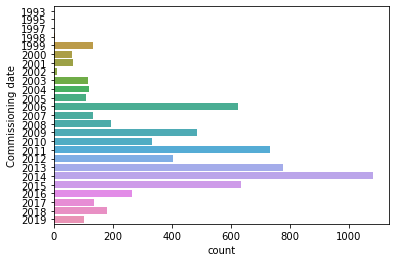

In [121]:
#plotting number of turbines installed per year
sns.countplot(y='Commissioning date',data=df)
plt.savefig('turbines installed per year')

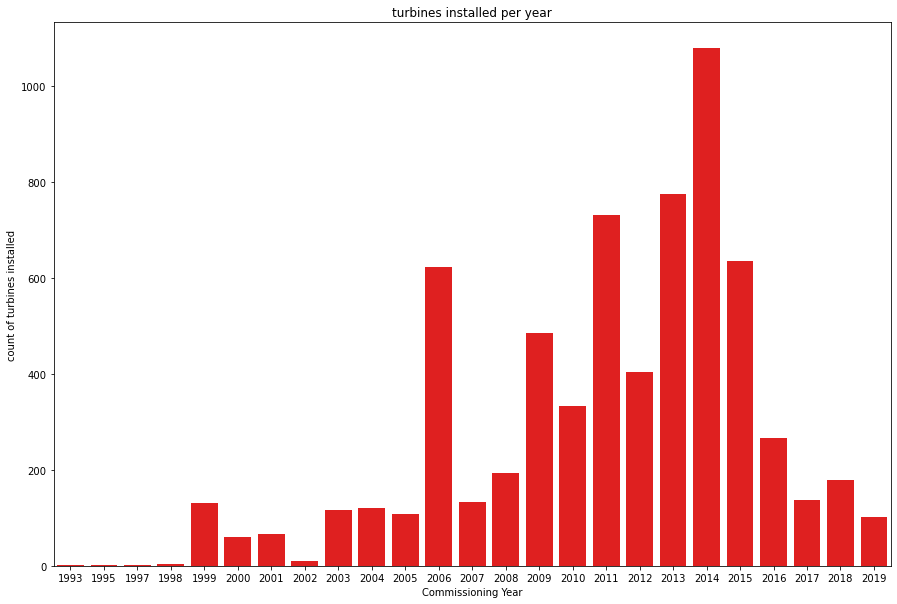

In [146]:
sns.countplot(df['Commissioning date'],color ='red')
plt.gcf().set_size_inches(15, 10)
plt.title("turbines installed per year")
plt.xlabel("Commissioning Year")
plt.ylabel("count of turbines installed")
plt.savefig('D:/11.jpg')

#Findings  

1.we can see that most of the turbines are installed in the year 2014  followed by 2013 with count of nearly 1150 and 800.

In [123]:
df['Project name'].nunique()

268

In [124]:
df['Total project capacity (MW)'].value_counts()

99.00     319
300.00    237
350.00    175
100.00    170
298.80    169
         ... 
1.40        1
0.50        1
1.80        1
0.65        1
0.75        1
Name: Total project capacity (MW), Length: 154, dtype: int64

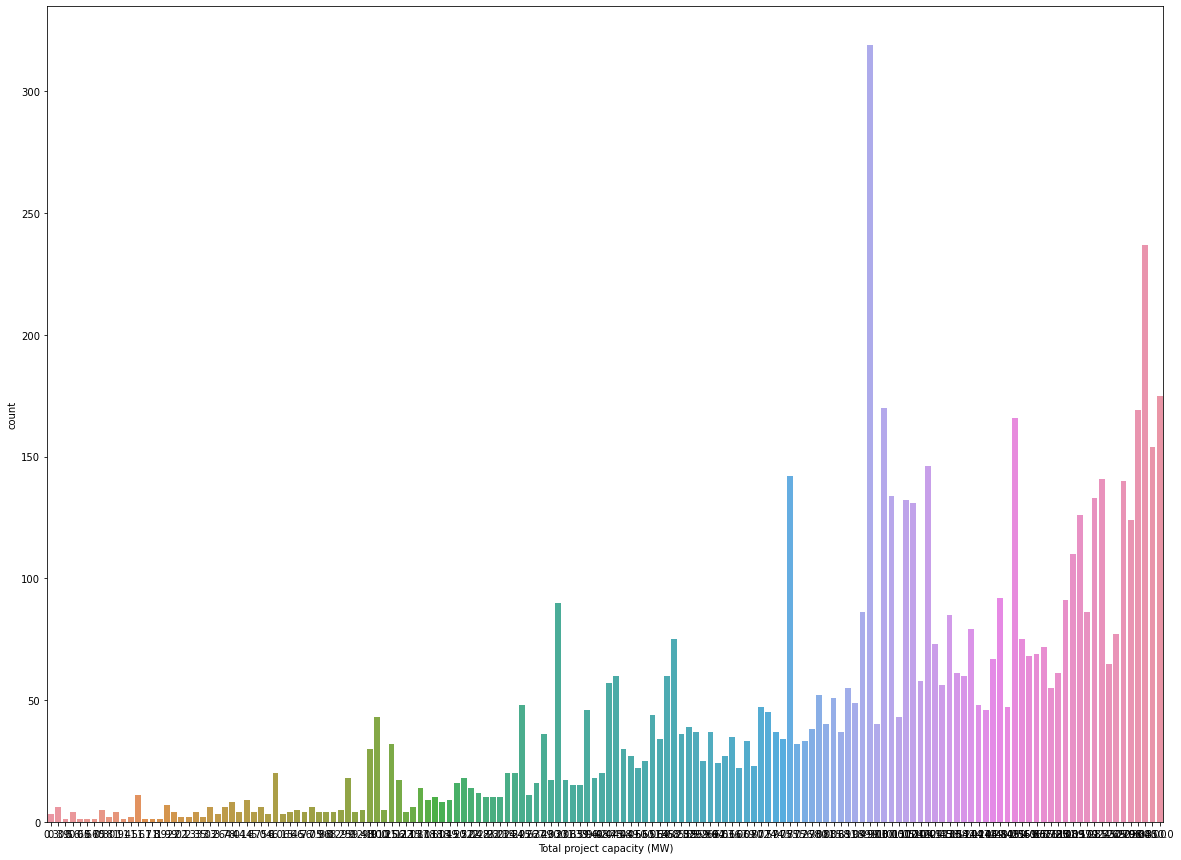

In [125]:
sns.countplot(df['Total project capacity (MW)'])
plt.gcf().set_size_inches(20, 15)

In [126]:
df['Total project capacity (MW)'].nunique()

154

In [127]:
#creating the data frame 
df1=df[['Project name','Total project capacity (MW)']]
df2=df1.drop_duplicates(['Project name', ])

In [128]:
print(df.dtypes)

OBJECTID                         int64
Province/Territory              object
Project name                    object
Total project capacity (MW)    float64
Turbine identifier              object
Turbine number in project       object
Turbine rated capacity (kW)      int32
Rotor diameter (m)             float64
Hub height (m)                 float64
Manufacturer                    object
Model                           object
Commissioning date               int32
Latitude                       float64
Longitude                      float64
Notes                           object
turbine number                  object
total turbines                  object
dtype: object


In [129]:
top_15=df2.nlargest(n=15, columns=['Total project capacity (MW)'])

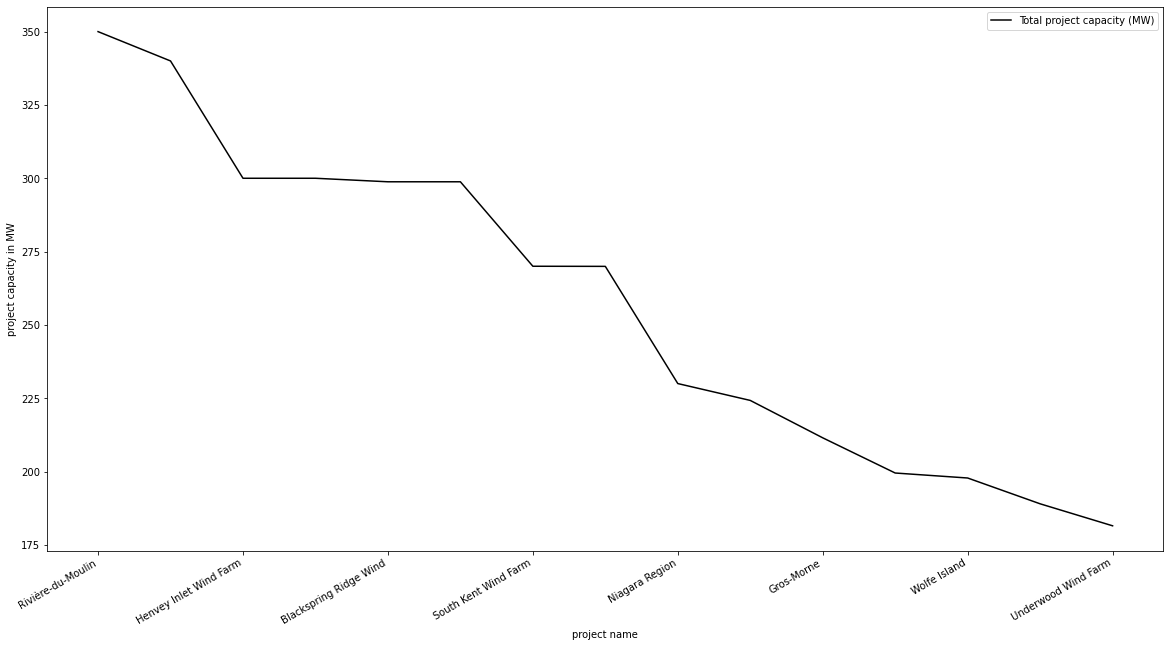

In [147]:
df3=df2.sort_values(['Project name',], ascending=False).groupby('Project name').head(15)
top_15.plot('Project name','Total project capacity (MW)',color="black")
plt.gcf().set_size_inches(20,10)
plt.xlabel("project name")
plt.ylabel("project capacity in MW")
plt.legend()
plt.xticks(rotation=30, ha='right')
plt.savefig('D:/12.jpg')

# findings

we can see the top 15 projects capacity ranges between 350 to 175 MW

<AxesSubplot:xlabel='Model', ylabel='count'>

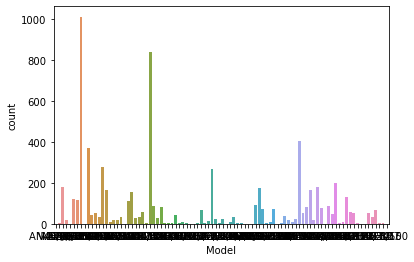

In [131]:
sns.countplot(df['Model'])


In [132]:
df_model= df[['Model','Turbine rated capacity (kW)']]
df_model.head(10)

,Model,Turbine rated capacity (kW)
0,AN 150/30,150
1,V44/600,600
2,V44/600,600
3,V44/600,600
4,V44/600,600
5,V47/660,660
6,N60/1300,1300
7,N60/1300,1300
8,N60/1300,1300
9,N60/1300,1300


In [133]:
df_model= df_model.drop_duplicates()
print(df_model)

          Model  Turbine rated capacity (kW)
0     AN 150/30                          150
1       V44/600                          600
5       V47/660                          660
6      N60/1300                         1300
21     E-40/600                          600
...         ...                          ...
5945  V117/3450                         3450
6185       E-72                         2300
6207    E-82 E2                         2300
6670        E82                         2000
6696    B23/150                          150

[125 rows x 2 columns]


In [134]:
df_model.head(25)

,Model,Turbine rated capacity (kW)
0,AN 150/30,150
1,V44/600,600
5,V47/660,660
6,N60/1300,1300
21,E-40/600,600
29,V80/1800,1800
145,V90/3000,3000
146,GE 1.5SLE,1500
166,LW750-52,750
319,GE 1.6-100,1600


In [135]:
top_30=df_model.nlargest(n=30, columns=['Turbine rated capacity (kW)'])
print(top_30)

            Model  Turbine rated capacity (kW)
1188   E-141/4200                         3750
4225    V136/3450                         3450
5945    V117/3450                         3450
1439         V126                         3300
1143   GE 3.2-103                         3200
4114  SWT 3.2-113                         3200
5806     3.2 M114                         3200
145      V90/3000                         3000
900     E-82/3000                         3000
1178     3.2 M114                         3000
1325          V90                         3000
1703  AW-3000/116                         3000
1738    E-92/3000                         3000
3351  SWT 3.0-113                         3000
4028   E-101/3000                         3000
4542   AW116/3000                         3000
5685         E-92                         3000
5798         E-82                         3000
4192  SWT 3.2-113                         2942
3319  GE 2.85-103                         2850
4191  SWT 3.2

In [136]:
model1=top_30['Model'].head(30)
turbine_capacity=top_30['Turbine rated capacity (kW)'].head(30)

<AxesSubplot:>

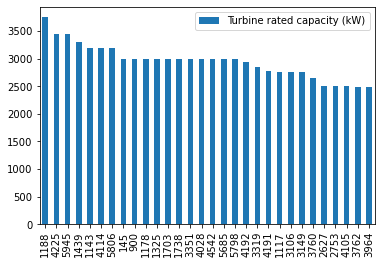

In [137]:
top_30.plot(kind='bar')

No handles with labels found to put in legend.


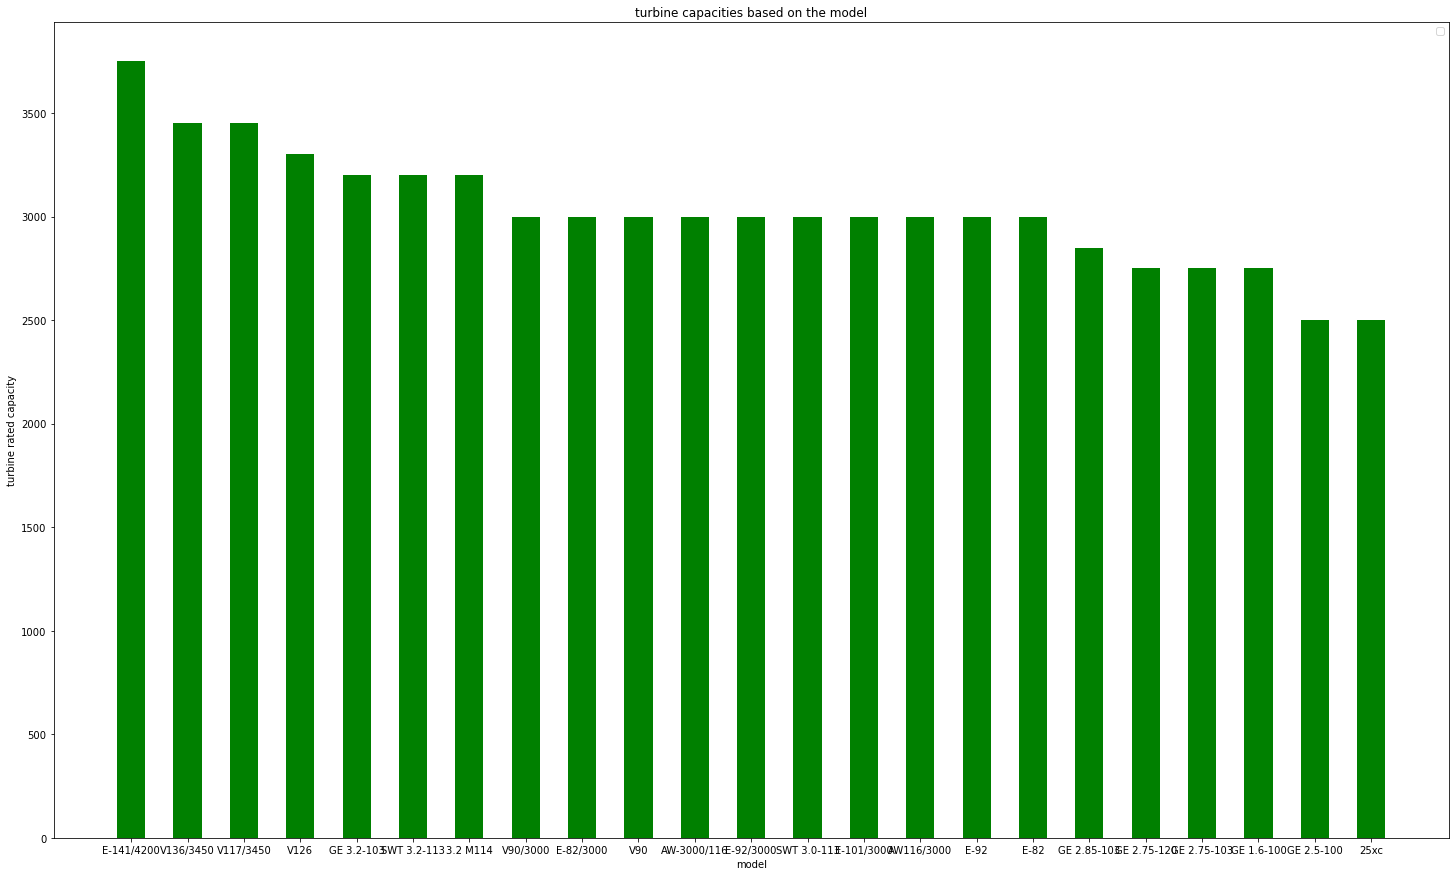

In [138]:
plt.bar(model1,turbine_capacity, color ='green',width = 0.5)
plt.gcf().set_size_inches(25,15)
plt.title("turbine capacities based on the model")
plt.xlabel("model")
plt.ylabel("turbine rated capacity")
plt.legend()

#finding

we can see that model-E-141/4200 is having the highest turbine rated capacity with 3750kw and the top 20 models range from 
3750 to 3000 kw 

In [139]:
manufacturer_count=df['Manufacturer'].value_counts()
manufacturer_count



Vestas                      1834
GE                          1725
Siemens                     1248
Enercon                      960
Senvion                      643
NEG Micon                    132
Acciona Wind Power            40
Acciona                       34
Nordex                        20
Suzlon                        15
Vensys                         9
Gamesa                         8
Windmatic                      6
DeWind                         5
Samsung Renewable Energy       4
Northwind                      3
Turbowinds                     3
EWT                            2
Lagerwey                       2
Bonus                          2
Leitwind                       1
Tacke                          1
Pfleiderer                     1
Name: Manufacturer, dtype: int64

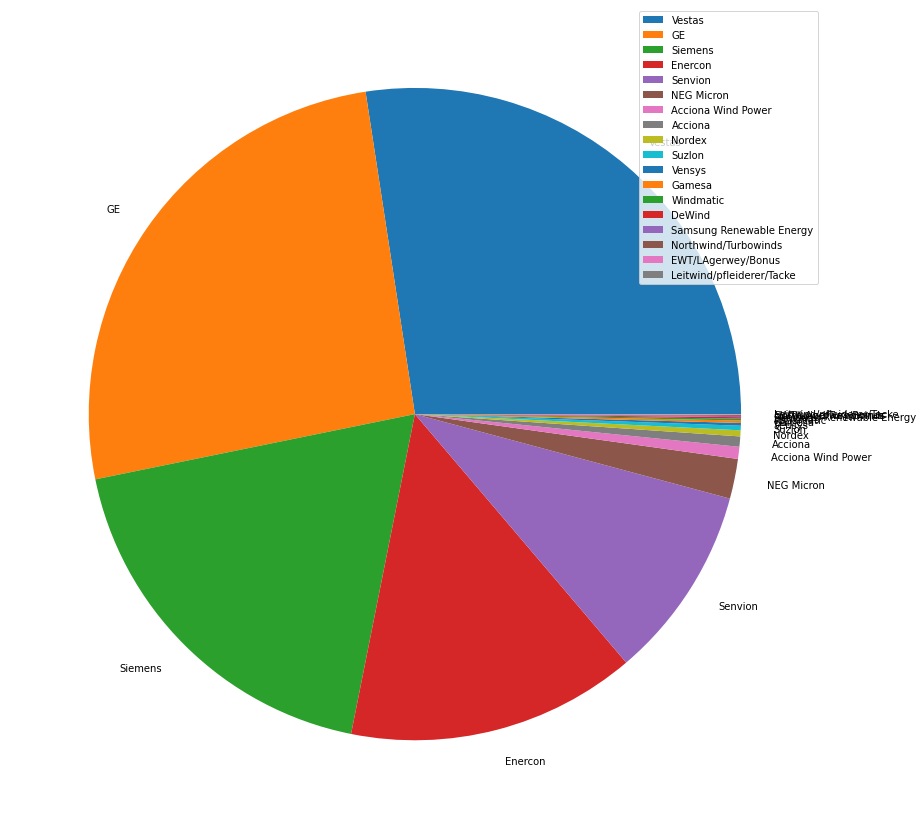

In [140]:
manufacturer_make=['Vestas','GE','Siemens','Enercon','Senvion','NEG Micron','Acciona Wind Power','Acciona','Nordex','Suzlon',
                   'Vensys','Gamesa','Windmatic','DeWind','Samsung Renewable Energy','Northwind/Turbowinds',
                   'EWT/LAgerwey/Bonus','Leitwind/pfleiderer/Tacke']
number_installed=['1834','1725','1248','960','643','132','40','34','20','15','9','8','6','5','4','3','2','1']

fig = plt.figure(figsize =(20, 15))
plt.pie(number_installed, labels =manufacturer_make,)
plt.legend()
plt.show()

In [141]:
!pip install plotly
import plotly.express as px

In [142]:
values=number_installed
names=manufacturer_make
fig =px.pie(df,values =values, names= names, title="manufacturer count")
fig.show()
print(names)

['Vestas', 'GE', 'Siemens', 'Enercon', 'Senvion', 'NEG Micron', 'Acciona Wind Power', 'Acciona', 'Nordex', 'Suzlon', 'Vensys', 'Gamesa', 'Windmatic', 'DeWind', 'Samsung Renewable Energy', 'Northwind/Turbowinds', 'EWT/LAgerwey/Bonus', 'Leitwind/pfleiderer/Tacke']


# findings


Bonus is the major market holder with 27.4% of market share f0llowed by Vestas 25.8%

In [143]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,OBJECTID,Total project capacity (MW),Turbine rated capacity (kW),Rotor diameter (m),Hub height (m),Commissioning date,Latitude,Longitude
OBJECTID,1.000000,0.292909,0.100017,0.035386,0.219674,0.238351,-0.118117,0.643776
Total project capacity (MW),0.292909,1.000000,0.221481,0.247333,0.312400,0.312331,0.042476,0.050905
Turbine rated capacity (kW),0.100017,0.221481,1.000000,0.750416,0.705761,0.658718,-0.102106,0.084780
Rotor diameter (m),0.035386,0.247333,0.750416,1.000000,0.772041,0.806995,-0.262277,0.003082
Hub height (m),0.219674,0.312400,0.705761,0.772041,1.000000,0.762655,-0.265800,0.191419
Commissioning date,0.238351,0.312331,0.658718,0.806995,0.762655,1.000000,-0.209882,0.138319
Latitude,-0.118117,0.042476,-0.102106,-0.262277,-0.265800,-0.209882,1.000000,-0.474531
Longitude,0.643776,0.050905,0.084780,0.003082,0.191419,0.138319,-0.474531,1.000000


In [148]:
x = df.iloc[:,7].values
y = df.iloc[:,8].values

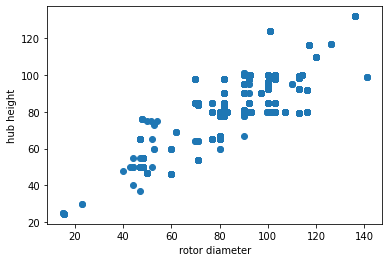

In [149]:
plt.scatter(x, y)
plt.xlabel('rotor diameter')
plt.ylabel('hub height')
plt.show()

In [150]:
correlation = np.corrcoef(x,y)

In [151]:
print("The correlation between x and y is : \n ",correlation)

The correlation between x and y is : 
  [[1.         0.77204084]
 [0.77204084 1.        ]]


 #findings
 
 
 
 
 we can see that the rotor diameter and hub height have high correlation of 0.772041

In [152]:
X = pd.get_dummies(df.iloc[:,[6,7]]).values
X

array([[150.,  23.],
       [600.,  44.],
       [600.,  44.],
       ...,
       [660.,  47.],
       [150.,  23.],
       [660.,  47.]])

In [153]:
from sklearn.cluster import KMeans

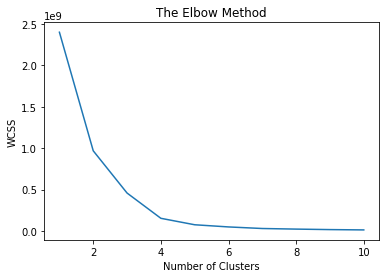

In [154]:
wcss = []

for i in range(1,11):
    cluster = KMeans(n_clusters=i, init='k-means++', random_state=42)
    cluster.fit(X)
    wcss.append(cluster.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

 Findings 
 
 
 based on the elbow method we can consider 4 clusters 

In [155]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

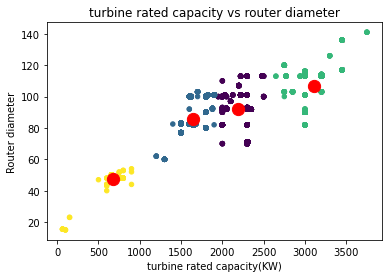

In [156]:
plt.scatter(X[:,0], X[:,1], c=y_kmeans, label=[f'Cluster {i}' for i in y_kmeans], s=20)
plt.scatter(kmeans.cluster_centers_[:,0],
           kmeans.cluster_centers_[:,1], s=150, c='red', label='Centroids')
plt.title('turbine rated capacity vs router diameter')
plt.xlabel('turbine rated capacity(KW)')
plt.ylabel('Router diameter')
plt.show()

# Now based on the router diameter we can see the 3 clusters are 
 1.  having a router diameter aroud 50 mts and there turbine rated capacity is between 0-900 kw
 2. having a router diameter aroud 80 mts and there turbine rated capacity is between 1000-1800 kw
 3. having a router diameter around 90 mts and there turbine rated capacity ranges between 1800-2600 kw
 4. having a router diameter around 100 mts and there turbine rated capacity ranges between 2600-3600 kw

In [157]:
Y = pd.get_dummies(df.iloc[:,[6,8]]).values
Y

array([[150.,  30.],
       [600.,  40.],
       [600.,  50.],
       ...,
       [660.,  50.],
       [150.,  30.],
       [660.,  37.]])

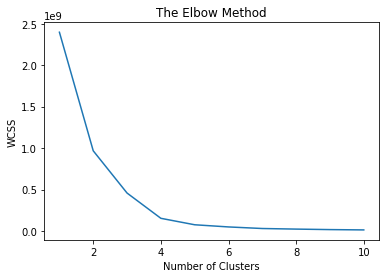

In [158]:
wcss = []

for i in range(1,11):
    cluster = KMeans(n_clusters=i, init='k-means++', random_state=42)
    cluster.fit(Y)
    wcss.append(cluster.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [159]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

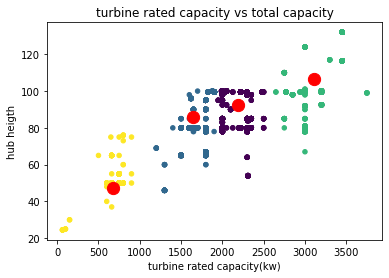

In [160]:
plt.scatter(Y[:,0], Y[:,1], c=y_kmeans, label=[f'Cluster {i}' for i in y_kmeans], s=20)
plt.scatter(kmeans.cluster_centers_[:,0],
           kmeans.cluster_centers_[:,1], s=150, c='red', label='Centroids')
plt.title('turbine rated capacity vs total capacity')
plt.xlabel('turbine rated capacity(kw)')
plt.ylabel('hub heigth')
plt.show()

from the 4 clusters we can see that 

1.when the hub heigth is between 20-80 the turbine capacity varies between 0-1000Kw

2.when the hub heigth is between 40-100 the turbine capacity varies between 1000-1800 kw

3.When the hub heigth is between 50-100 the turbine capacity varies betweem 1800-2500 kw

4.when the hub heigth is between 70-130 the turbine capacity varies between 2600-3700 kw

In [161]:
x1= pd.get_dummies(df.iloc[:,[6,3]]).values
x1

array([[150.  ,   0.9 ],
       [600.  ,  44.  ],
       [600.  ,   3.78],
       ...,
       [660.  ,  10.56],
       [150.  ,   0.81],
       [660.  ,   0.81]])

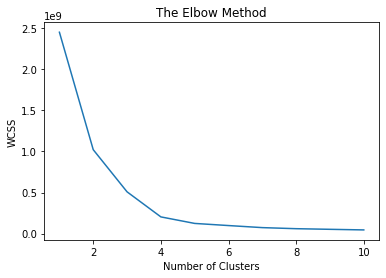

In [162]:
wcss = []

for i in range(1,11):
    cluster = KMeans(n_clusters=i, init='k-means++', random_state=42)
    cluster.fit(x1)
    wcss.append(cluster.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

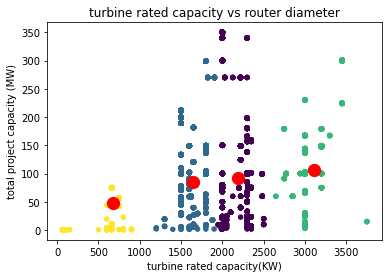

In [163]:
plt.scatter(x1[:,0], x1[:,1], c=y_kmeans, label=[f'Cluster {i}' for i in y_kmeans], s=20)
plt.scatter(kmeans.cluster_centers_[:,0],
           kmeans.cluster_centers_[:,1], s=150, c='red', label='Centroids')
plt.title('turbine rated capacity vs router diameter')
plt.xlabel('turbine rated capacity(KW)')
plt.ylabel('total project capacity (MW)')
plt.show()

we can see that we have 4 clusters which are 
1. The turbines having capacity ranging from 500-1000kw and having a total capabilty to generate 0-90 mw 
2. The turbines having capacity ranging from 1200-2000 kw and having a total capabilty to generate 0-230 mw 
3. The turbines having capacity ranging from 2000-250000kw and having a total capabilty to generate 0-350 mw 
4. The turbines having capacity ranging from 2600-3500kw and having a total capabilty to generate 0-300mw 

In [164]:
#linear regression 

x= pd.get_dummies(df.iloc[:,[7,8]]).values
x
y = df.iloc[:,6].values

In [165]:
y

array([150, 600, 600, ..., 660, 150, 660])

In [166]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [167]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [168]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [169]:
print(x)

[[23. 30.]
 [44. 40.]
 [44. 50.]
 ...
 [47. 50.]
 [23. 30.]
 [47. 37.]]


In [170]:
y_predicted = model.predict(x)

In [171]:
mse=mean_squared_error(y,y_predicted)

In [172]:
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)

In [173]:
print('Intercept:',model.intercept_)
print('MSE:',mse)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Intercept: -743.3828334551213
MSE: 142101.74665556225
Root mean squared error:  376.9638532479769
R2 score:  0.6026818897568924


#findings 


based on the R2 score we can say that the dependent variable turbine rated capacity is not completly effected by the
height and router diameter